In [45]:
import pandas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [189]:
# events_pulses_file = "/mnt/research/IceCube/Gupta-Reco/hans/pulses_ds_event_9505_N100_from_0_to_10_1st_pulse.ftr"
# events_meta_file = "/mnt/research/IceCube/Gupta-Reco/hans/meta_ds_event_9505_N100_from_0_to_10_1st_pulse.ftr"
# events_pulses_file = "/mnt/home/baburish/jax/TriplePandelReco_JAX/pulses_ds_event_10145_from_0_to_10_1st_pulse.ftr"
# events_meta_file = "/mnt/home/baburish/jax/TriplePandelReco_JAX/meta_ds_event_10145_from_0_to_10_1st_pulse.ftr"

events_pulses_file = "/mnt/research/IceCube/Gupta-Reco/22645/0001000-0001999-tfrecords/pulses_ds_22645_from_1000_to_2000_10_to_100TeV.ftr"
events_meta_file = "/mnt/research/IceCube/Gupta-Reco/22645/0001000-0001999-tfrecords/meta_ds_22645_from_1000_to_2000_10_to_100TeV.ftr"

# events_pulses_file = "/mnt/research/IceCube/Gupta-Reco/22645/0000000-0000999-tfrecords/pulses_ds_22645_from_0_to_1000_10_to_100TeV.ftr"
# events_meta_file = "/mnt/research/IceCube/Gupta-Reco/22645/0000000-0000999-tfrecords/meta_ds_22645_from_0_to_1000_10_to_100TeV.ftr"
geo_file = '/mnt/home/baburish/jax/TriplePandelReco_JAX/data/icecube/detector_geometry.csv'

events_meta = pd.read_feather(events_meta_file)
events_data = pd.read_feather(events_pulses_file)
geo = pd.read_csv(geo_file)


int_cols_meta = ["event_id", "idx_start", "idx_end", "n_channel_HLC", "n_channel"]
events_meta[int_cols_meta] = events_meta[int_cols_meta].astype("Int64")

int_cols_data = ["event_id", "sensor_id", "is_HLC"]
events_data[int_cols_data] = events_data[int_cols_data].astype("Int64")

In [190]:
len(events_meta)

5513

In [191]:
print(events_meta.head())
print(events_meta.info())

          event_id  idx_start  idx_end  n_channel_HLC  neutrino_energy  \
0  226450100000187          0      187             48     21793.159288   
1  226450100000459          0      285             75     16653.058823   
2  226450100000488          0       53             23    550971.053740   
3  226450100000783          0       73             24    103302.127462   
4  226450100000798          0      350            116     11093.243845   

    muon_energy  muon_energy_at_detector  muon_energy_lost       q_tot  \
0  17244.120597              3544.689246       3544.689246  167.150001   
1   7219.417407              7219.417407       2155.238474  360.449999   
2  67057.600728              4798.107006       1626.798665   40.750000   
3  78490.299373              1890.031302       1890.031302   54.925000   
4   9548.598385              9548.598385       2540.355458  330.625000   

   n_channel  ...     muon_time   muon_pos_x   muon_pos_y   muon_pos_z  \
0         64  ... -11096.545092  550

In [192]:
duplicates = events_data[events_data.duplicated()]
duplicate_counts = events_data.duplicated().sum()
print("Number of rows:", len(events_data))
print("Number of duplicate rows:", duplicate_counts)
print(duplicates)

Number of rows: 883952
Number of duplicate rows: 0
Empty DataFrame
Columns: [event_id, sensor_id, time, charge, is_HLC]
Index: []


In [193]:
duplicates = events_meta[events_meta.duplicated()]
duplicate_counts = events_meta.duplicated().sum()
print("Number of rows:", len(events_meta))
print("Number of duplicate rows:", duplicate_counts)
print(duplicates)

Number of rows: 5513
Number of duplicate rows: 0
Empty DataFrame
Columns: [event_id, idx_start, idx_end, n_channel_HLC, neutrino_energy, muon_energy, muon_energy_at_detector, muon_energy_lost, q_tot, n_channel, muon_zenith, muon_azimuth, muon_time, muon_pos_x, muon_pos_y, muon_pos_z, spline_mpe_zenith, spline_mpe_azimuth, spline_mpe_time, spline_mpe_pos_x, spline_mpe_pos_y, spline_mpe_pos_z]
Index: []

[0 rows x 22 columns]


In [194]:
events_meta

,event_id,idx_start,idx_end,n_channel_HLC,neutrino_energy,muon_energy,muon_energy_at_detector,muon_energy_lost,q_tot,n_channel,...,muon_time,muon_pos_x,muon_pos_y,muon_pos_z,spline_mpe_zenith,spline_mpe_azimuth,spline_mpe_time,spline_mpe_pos_x,spline_mpe_pos_y,spline_mpe_pos_z
0,226450100000187,0,187,48,21793.159288,17244.120597,3544.689246,3544.689246,167.150001,64,...,-11096.545092,5508.718641,3685.222652,-704.011589,1.718503,0.568009,10621.724292,82.990311,207.828119,213.557402
1,226450100000459,0,285,75,16653.058823,7219.417407,7219.417407,2155.238474,360.449999,100,...,9398.264300,-5.036318,-473.854976,-610.491686,2.752751,4.094655,11461.296570,124.912822,-280.598351,-40.590229
2,226450100000488,0,53,23,550971.053740,67057.600728,4798.107006,1626.798665,40.750000,33,...,336.283734,1283.595674,-2412.949529,-1361.838843,2.083883,5.091758,10556.799796,295.298604,60.080830,155.239569
3,226450100000783,0,73,24,103302.127462,78490.299373,1890.031302,1890.031302,54.925000,41,...,2696.314837,2123.127048,-515.604613,-1336.733591,2.010656,6.119181,10698.203610,-23.408796,-184.813699,-331.525896
4,226450100000798,0,350,116,11093.243845,9548.598385,9548.598385,2540.355458,330.625000,134,...,9609.022501,-543.815210,92.065366,-378.589554,1.822142,2.792956,10836.030420,-209.643047,-27.633301,-286.963973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5508,226450199902133,0,38,20,36352.180585,4277.924610,1267.540077,1083.487979,34.275000,26,...,1297.931940,-2371.988513,908.680347,-1147.651344,2.157810,2.896654,10551.007926,-122.753916,339.831708,368.734320
5509,226450199905845,0,135,55,47305.707074,35046.007334,4708.027966,2105.138175,128.550000,73,...,2491.227126,1158.479652,378.307857,-2376.107985,2.624332,0.340621,10522.299015,25.549018,-24.868253,-290.146588
5510,226450199905896,0,99,42,11356.358773,10176.705648,3215.049022,1757.569322,88.550000,52,...,6489.791700,1616.954795,-621.909806,-703.636411,2.156107,5.687830,12447.371901,376.358180,212.818046,272.244981
5511,226450199906495,0,1370,135,52257.081842,8408.216725,8408.216725,2425.732502,2380.025004,151,...,9583.434619,-442.310414,-278.336708,-150.340128,1.545686,4.373558,9749.694947,-424.829288,-234.286461,-153.181071


In [195]:
events_data

,event_id,sensor_id,time,charge,is_HLC
0,226450100000187,1871,12775.0,0.925,1
1,226450100000187,1871,12784.0,1.225,1
2,226450100000187,1871,12805.0,1.375,1
3,226450100000187,1872,12773.0,1.475,1
4,226450100000187,1872,12828.0,0.425,1
...,...,...,...,...,...
883947,226450199907195,3051,11676.0,0.875,1
883948,226450199907195,3063,13505.0,0.925,0
883949,226450199907195,3080,12723.0,1.275,0
883950,226450199907195,3083,13258.0,0.975,0


In [196]:
charge = events_data[events_data["event_id"] == 226450000000112]['charge']
aa = events_data[events_data["event_id"] == 226450000000112]
charge

Series([], Name: charge, dtype: float64)

In [197]:
aa

,event_id,sensor_id,time,charge,is_HLC


In [198]:
aaa = aa[aa['sensor_id']==2187]
aaa

,event_id,sensor_id,time,charge,is_HLC


In [199]:
max_idx=events_meta['muon_energy'].argmax()

In [200]:
events_meta.iloc[max_idx]

event_id                   226450169202852.0
idx_start                                0.0
idx_end                               3271.0
n_channel_HLC                          285.0
neutrino_energy                999359.863038
muon_energy                    940949.777443
muon_energy_at_detector          1721.393413
muon_energy_lost              -205552.139374
q_tot                            6506.850003
n_channel                              329.0
muon_zenith                         1.737046
muon_azimuth                         2.23808
muon_time                       -9924.126608
muon_pos_x                      -3849.741402
muon_pos_y                       5052.282061
muon_pos_z                       -873.587382
spline_mpe_zenith                   1.737204
spline_mpe_azimuth                  2.239325
spline_mpe_time                 11606.574744
spline_mpe_pos_x                   89.076524
spline_mpe_pos_y                   52.151095
spline_mpe_pos_z                  194.885266
Name: 3768

In [201]:
def get_event_data(event_index: int) -> pd.DataFrame:
    ev_idx = event_index
    event_meta = events_meta.iloc[ev_idx]
    event_data = (events_data.iloc[int(event_meta.idx_start): int(event_meta.idx_end + 1)]).copy(deep=True)
    return event_meta, event_data

In [202]:
def get_event_data(event_index: int) -> pd.DataFrame:
    ev_idx = event_index
    event_meta = events_meta.iloc[ev_idx]
    print(event_meta)
    event_id = event_meta['event_id']
    
    event_data = events_data[events_data['event_id'] == event_id].copy()
    return event_meta, event_data

In [203]:
for ev_idx in range(2):
    event_meta = events_meta.iloc[ev_idx]
    event_id = event_meta['event_id']
    
    event_data = events_data[events_data['event_id'] == event_id].copy()
    
    print(f"Event ID: {event_id}")
    print("Number of pulses:", len(event_data))
    print(event_data.head())

Event ID: 226450100000187.0
Number of pulses: 188
          event_id  sensor_id     time  charge  is_HLC
0  226450100000187       1871  12775.0   0.925       1
1  226450100000187       1871  12784.0   1.225       1
2  226450100000187       1871  12805.0   1.375       1
3  226450100000187       1872  12773.0   1.475       1
4  226450100000187       1872  12828.0   0.425       1
Event ID: 226450100000459.0
Number of pulses: 286
            event_id  sensor_id     time  charge  is_HLC
188  226450100000459         57  11179.0   0.925       1
189  226450100000459         59  11301.0   0.625       1
190  226450100000459        115  10585.0   1.075       1
191  226450100000459        117  10596.0   0.975       1
192  226450100000459        117  10624.0   0.975       1


In [204]:
def get_per_dom_summary_from_sim_data(
    meta: pd.DataFrame,
    pulses: pd.DataFrame,
    charge_key='charge',
    correct_charge=False) -> pd.DataFrame:

    df_qtot = pulses[['sensor_id', charge_key]].groupby(by=['sensor_id'], as_index=False).sum()
    df_tmin = pulses[['sensor_id', 'time']].groupby(by=['sensor_id'], as_index=False).min()
    df = df_qtot.merge(geo.iloc[df_qtot['sensor_id']], on='sensor_id', how='outer')
    df['time'] = df_tmin['time'].values

    if correct_charge == True:
        df_corr = pulses[['sensor_id', 'charge_correction']].groupby(by=['sensor_id'], as_index=False).mean()
        df['charge'] = df['charge'].values * df_corr['charge_correction'].values

    if charge_key != 'charge':
        df.rename({charge_key: 'charge'}, inplace=True, axis='columns')
    return df

In [205]:
def replace_early_pulse(summary_data, pulses):
    corrected_time = np.zeros(len(summary_data))
    for i, row in summary_data.iterrows():
        s_id = row['sensor_id']
        q_tot = row['charge']
        t1 = row['time']

        idx = pulses['sensor_id'] == s_id
        pulses_this_dom = pulses[idx]
        corrected_time[i] = get_first_regular_pulse(pulses_this_dom, t1, q_tot)



    summary_data['time'] = corrected_time

In [206]:
def get_first_regular_pulse(pulses, t1, q_tot, crit_delta=10, crit_ratio = 5.e-3, crit_charge=100.):
    # technically, if we do remove early pulses, one could correct the total charge.
    # in practice, this would be an epsilon correction. Not worth adding the extra code complexity.
    # calculate ratio of charge within 10ns and 75ns of hit.
    if q_tot < crit_charge:
        return t1

    n = len(pulses)
    charge = pulses['charge'].to_numpy()
    time = pulses['time'].to_numpy()
    crit_delta_long = 75

    j = 0 # pts to end of crit_delta interval
    k = 0 # pts to end of crit_delta_long interval
    q_veto = 0
    q_long = 0
    for i in range(0, n):
        crit_time = time[i] + crit_delta
        if j < i:
            j = i

        # extend window
        while j < n and time[j] < crit_time:
            q_veto += charge[j]
            j += 1

        crit_time = time[i] + crit_delta_long
        if k < i:
            k = i

        # extend window
        while k < n and time[k] < crit_time:
            q_long += charge[k]
            k += 1

        r_veto = q_veto / q_long
        if r_veto > crit_ratio:
            # found a reasonable pulse
            # break
            break

        # remove early pulse
        q_long -= charge[i]
        q_veto -= charge[i]

    return time[i]

In [207]:
index = max_idx
meta, pulses = get_event_data(index)
event_data = get_per_dom_summary_from_sim_data(meta, pulses)
replace_early_pulse(event_data, pulses)

event_id                   226450169202852.0
idx_start                                0.0
idx_end                               3271.0
n_channel_HLC                          285.0
neutrino_energy                999359.863038
muon_energy                    940949.777443
muon_energy_at_detector          1721.393413
muon_energy_lost              -205552.139374
q_tot                            6506.850003
n_channel                              329.0
muon_zenith                         1.737046
muon_azimuth                         2.23808
muon_time                       -9924.126608
muon_pos_x                      -3849.741402
muon_pos_y                       5052.282061
muon_pos_z                       -873.587382
spline_mpe_zenith                   1.737204
spline_mpe_azimuth                  2.239325
spline_mpe_time                 11606.574744
spline_mpe_pos_x                   89.076524
spline_mpe_pos_y                   52.151095
spline_mpe_pos_z                  194.885266
Name: 3768

In [208]:
# for illustration, we look at the summary data of the brightest DOM.
ix = event_data['charge'].argmax()
print(event_data.loc[ix, ['sensor_id', 'charge', 'x', 'y', 'z', 'time']])

# and remember the ID of the brightest sensor.
brightest_sensor_id = event_data.loc[ix, 'sensor_id']
print("")

# just FYI, in case you want to know the string and dom:
string, om = divmod(brightest_sensor_id, 60)
string += 1 # string indexing starts at 1 IceCube
om += 1 # om indexing starts at 1 in IceCube
print(f"selected DOM is located on IceCube string {string} and is number {om}.")

sensor_id        3259.0
charge       532.425001
x                 11.87
y                179.19
z                178.95
time            11181.0
Name: 192, dtype: Float64

selected DOM is located on IceCube string 55 and is number 20.


In [209]:
# let's get all pulses for this DOM (and not just the 1st one)
sensor_selection = pulses['sensor_id'] == brightest_sensor_id
pulses_this_dom = pulses[sensor_selection]

print(f"selected DOM has recorded {len(pulses_this_dom)} pulses.")

selected DOM has recorded 81 pulses.


In [210]:
def plot_event(df, geo=None, outfile=None, plot_pdf=None):
    fig = plt.figure(figsize=(12,8))
    ax = plt.subplot(projection='3d')
    ax.set_xlabel('pos.x [m]', fontsize=16, labelpad=-25)
    ax.set_ylabel('pos.y [m]', fontsize=16, labelpad=-25)
    ax.set_zlabel('pos.z [m]', fontsize=16, labelpad=-25)

    try:
        im = ax.scatter(geo['x'], geo['y'], geo['z'], s=0.9, c='0.7', alpha=0.8)
    except:
        pass

    im = ax.scatter(df['x'], df['y'], df['z'], s=np.sqrt(df['charge']*100), c=df['time'],
                    cmap='rainbow_r',  edgecolors='k', zorder=1000)
    ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=16)
    cb = plt.colorbar(im, orientation="vertical", pad=0.1)
    cb.set_label(label='time [ns]', size='x-large')
    cb.ax.tick_params(labelsize='x-large')
    if plot_pdf:
        pdf.savefig()
        plt.close()
    else:
        plt.show()
    # if outfile is None:
    #     plt.show()

    # else:
    #     plt.savefig(outfile, dpi=300)

event_id                   226450169202852.0
idx_start                                0.0
idx_end                               3271.0
n_channel_HLC                          285.0
neutrino_energy                999359.863038
muon_energy                    940949.777443
muon_energy_at_detector          1721.393413
muon_energy_lost              -205552.139374
q_tot                            6506.850003
n_channel                              329.0
muon_zenith                         1.737046
muon_azimuth                         2.23808
muon_time                       -9924.126608
muon_pos_x                      -3849.741402
muon_pos_y                       5052.282061
muon_pos_z                       -873.587382
spline_mpe_zenith                   1.737204
spline_mpe_azimuth                  2.239325
spline_mpe_time                 11606.574744
spline_mpe_pos_x                   89.076524
spline_mpe_pos_y                   52.151095
spline_mpe_pos_z                  194.885266
Name: 3768

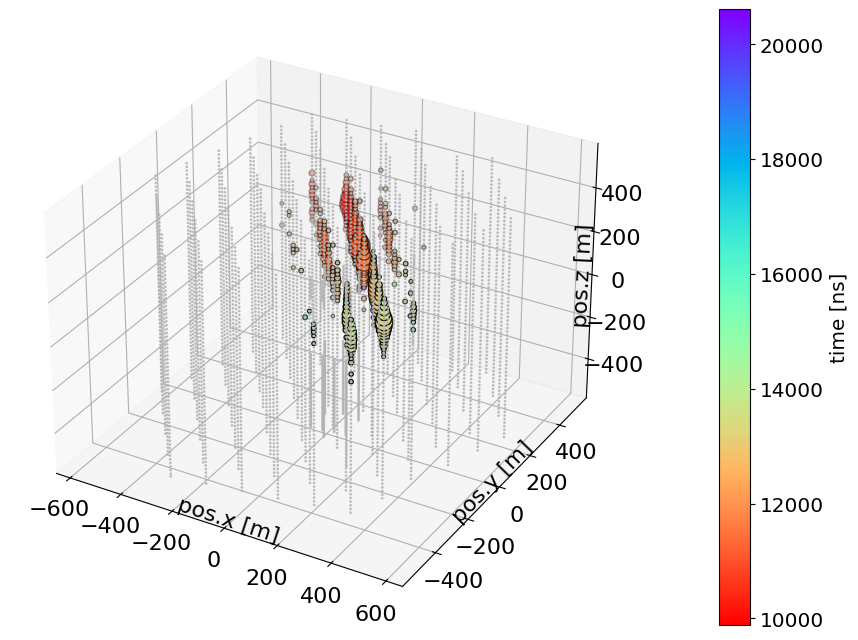

In [211]:
index = max_idx
meta, pulses = get_event_data(index)
event_data = get_per_dom_summary_from_sim_data(meta, pulses)
replace_early_pulse(event_data, pulses)
ix = event_data['charge'].argmax()

# and remember the ID of the brightest sensor.
brightest_sensor_id = event_data.loc[ix, 'sensor_id']

# just FYI, in case you want to know the string and dom:
string, om = divmod(brightest_sensor_id, 60)
string += 1 # string indexing starts at 1 IceCube
om += 1 # om indexing starts at 1 in IceCube
print(f"selected DOM is located on IceCube string {string} and is number {om}.")
plot_event(event_data, geo=geo)

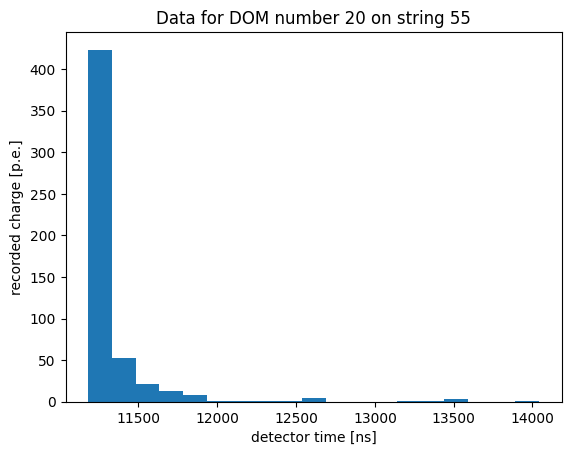

In [212]:
# let's visualize pulses
min_time = pulses_this_dom['time'].min()
max_time = pulses_this_dom['time'].max()
time_bins = np.linspace(min_time, max_time, 20)

plt.figure()
plt.hist(pulses_this_dom['time'], bins=time_bins, weights=pulses_this_dom['charge'])
# plt.yscale('log')
plt.ylabel("recorded charge [p.e.]")
plt.xlabel("detector time [ns]")
plt.title(f"Data for DOM number {om} on string {string}")
plt.show()

In [31]:
with PdfPages("output.pdf") as pdf:
    for i in range(20, 30):
        index = i
        meta, pulses = get_event_data(index)
        event_data = get_per_dom_summary_from_sim_data(meta, pulses)
        replace_early_pulse(event_data, pulses)
        ix = event_data['charge'].argmax()

        # and remember the ID of the brightest sensor.
        brightest_sensor_id = event_data.loc[ix, 'sensor_id']
        print("")

        # just FYI, in case you want to know the string and dom:
        string, om = divmod(brightest_sensor_id, 60)
        string += 1 # string indexing starts at 1 IceCube
        om += 1 # om indexing starts at 1 in IceCube
        print(f"selected DOM is located on IceCube string {string} and is number {om}.")
        plot_event(event_data, geo=geo, plot_pdf=True)
        d = pdf.infodict()
        d['Title'] = 'My analysis plots'
        d['Author'] = 'Rishi Babu'
        d['Subject'] = 'Pulse/meta data visualization'
        d['Keywords'] = 'IceCube, muons, matplotlib'


selected DOM is located on IceCube string 56 and is number 56.

selected DOM is located on IceCube string 39 and is number 49.

selected DOM is located on IceCube string 59 and is number 47.

selected DOM is located on IceCube string 44 and is number 59.

selected DOM is located on IceCube string 56 and is number 28.

selected DOM is located on IceCube string 76 and is number 19.

selected DOM is located on IceCube string 28 and is number 7.

selected DOM is located on IceCube string 57 and is number 20.

selected DOM is located on IceCube string 67 and is number 58.

selected DOM is located on IceCube string 55 and is number 4.


In [34]:
pulses_this_dom

,event_id,sensor_id,time,charge,is_HLC
774257,226450088406994,2897,11226.0,1.725,1
774258,226450088406994,2897,11241.0,2.225,1
774259,226450088406994,2897,11267.0,1.125,1


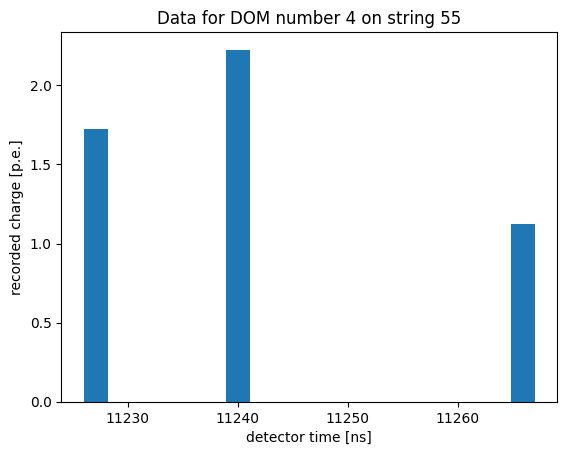

In [32]:
# let's visualize pulses
min_time = pulses_this_dom['time'].min()
max_time = pulses_this_dom['time'].max()
time_bins = np.linspace(min_time, max_time, 20)

plt.figure()
plt.hist(pulses_this_dom['time'], bins=time_bins, weights=pulses_this_dom['charge'])
# plt.yscale('log')
plt.ylabel("recorded charge [p.e.]")
plt.xlabel("detector time [ns]")
plt.title(f"Data for DOM number {om} on string {string}")
plt.show()

In [130]:
counts, bin_edges = np.histogram(pulses_this_dom['time'], bins=time_bins, density=False)

# Convert counts to PDF (sum to 1)
pdf = counts / counts.sum()

# Bin centers for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

print("Bin centers:", bin_centers)
print("PDF:", pdf)

Bin centers: [13117.42105263 13124.26315789 13131.10526316 13137.94736842
 13144.78947368 13151.63157895 13158.47368421 13165.31578947
 13172.15789474 13179.         13185.84210526 13192.68421053
 13199.52631579 13206.36842105 13213.21052632 13220.05263158
 13226.89473684 13233.73684211 13240.57894737]
PDF: [0.1 0.2 0.  0.1 0.  0.  0.1 0.  0.1 0.  0.  0.1 0.  0.1 0.1 0.  0.  0.
 0.1]


x grid: [13114.         13115.31313131 13116.62626263 13117.93939394
 13119.25252525 13120.56565657 13121.87878788 13123.19191919
 13124.50505051 13125.81818182 13127.13131313 13128.44444444
 13129.75757576 13131.07070707 13132.38383838 13133.6969697
 13135.01010101 13136.32323232 13137.63636364 13138.94949495
 13140.26262626 13141.57575758 13142.88888889 13144.2020202
 13145.51515152 13146.82828283 13148.14141414 13149.45454545
 13150.76767677 13152.08080808 13153.39393939 13154.70707071
 13156.02020202 13157.33333333 13158.64646465 13159.95959596
 13161.27272727 13162.58585859 13163.8989899  13165.21212121
 13166.52525253 13167.83838384 13169.15151515 13170.46464646
 13171.77777778 13173.09090909 13174.4040404  13175.71717172
 13177.03030303 13178.34343434 13179.65656566 13180.96969697
 13182.28282828 13183.5959596  13184.90909091 13186.22222222
 13187.53535354 13188.84848485 13190.16161616 13191.47474747
 13192.78787879 13194.1010101  13195.41414141 13196.72727273
 13198.04040404 13

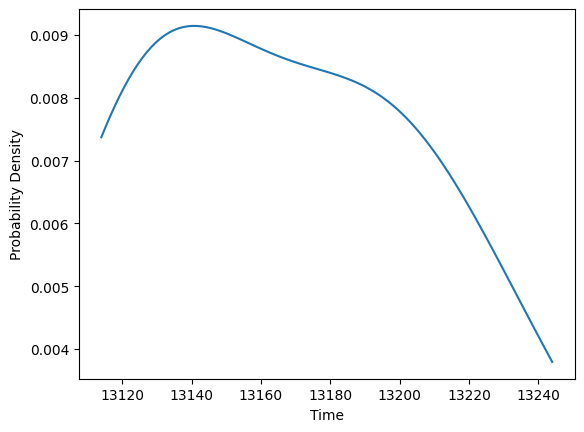

In [131]:
from scipy.stats import gaussian_kde

# Kernel Density Estimate
time_array=pulses_this_dom['time']
kde = gaussian_kde(time_array)

# Evaluate PDF on a grid
x_grid = np.linspace(time_array.min(), time_array.max(), 100)
pdf_values = kde(x_grid)

# Normalize to make sure integral = 1
pdf_values /= np.trapz(pdf_values, x_grid)

print("x grid:", x_grid)
print("PDF values:", pdf_values)
import matplotlib.pyplot as plt

plt.plot(x_grid, pdf_values)
plt.xlabel("Time")
plt.ylabel("Probability Density")
plt.show()